In [45]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [46]:
#Loading the dataset

df = pd.read_csv("/Users/swathy/Downloads/prices-split-adjusted.csv")

In [47]:
ksu_rows = df[df['symbol'] == 'KSU']

stock_data = ksu_rows[['date','close']].copy()


stock_data['date'] = pd.to_datetime(stock_data['date'])

stock_data.to_csv('selected_data.csv', index=False)

In [48]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.set_index('date', inplace=True)

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data.values)

In [49]:
look_back = 60

# Split the data into train (80%) and test (20%) datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - look_back:]

In [50]:
X_train, y_train = [], []
for i in range(look_back, len(train_data)):
    X_train.append(train_data[i - look_back:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [51]:
X_test, y_test = [], []
for i in range(look_back, len(test_data)):
    X_test.append(test_data[i - look_back:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(stock_data.columns)

Index(['close'], dtype='object')


In [52]:
#LSTM model
model = Sequential()  

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
 
model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
model.fit(X_train, y_train, epochs=30, batch_size=32)


predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Undo scaling


rmse = np.sqrt(np.mean((predictions - scaler.inverse_transform(y_test.reshape(-1, 1))) ** 2))
print(f'Root Mean Squared Error: {rmse}')

Epoch 1/30
43/43 [==============================] - 3s 27ms/step - loss: 0.0484
Epoch 2/30
43/43 [==============================] - 1s 27ms/step - loss: 0.0066
Epoch 3/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0057
Epoch 4/30
43/43 [==============================] - 1s 30ms/step - loss: 0.0054
Epoch 5/30
43/43 [==============================] - 1s 30ms/step - loss: 0.0049
Epoch 6/30
43/43 [==============================] - 1s 30ms/step - loss: 0.0048
Epoch 7/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0051
Epoch 8/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0052
Epoch 9/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0044
Epoch 10/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0038
Epoch 11/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0045
Epoch 12/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0044
Epoch 13/30
43/43 [==================

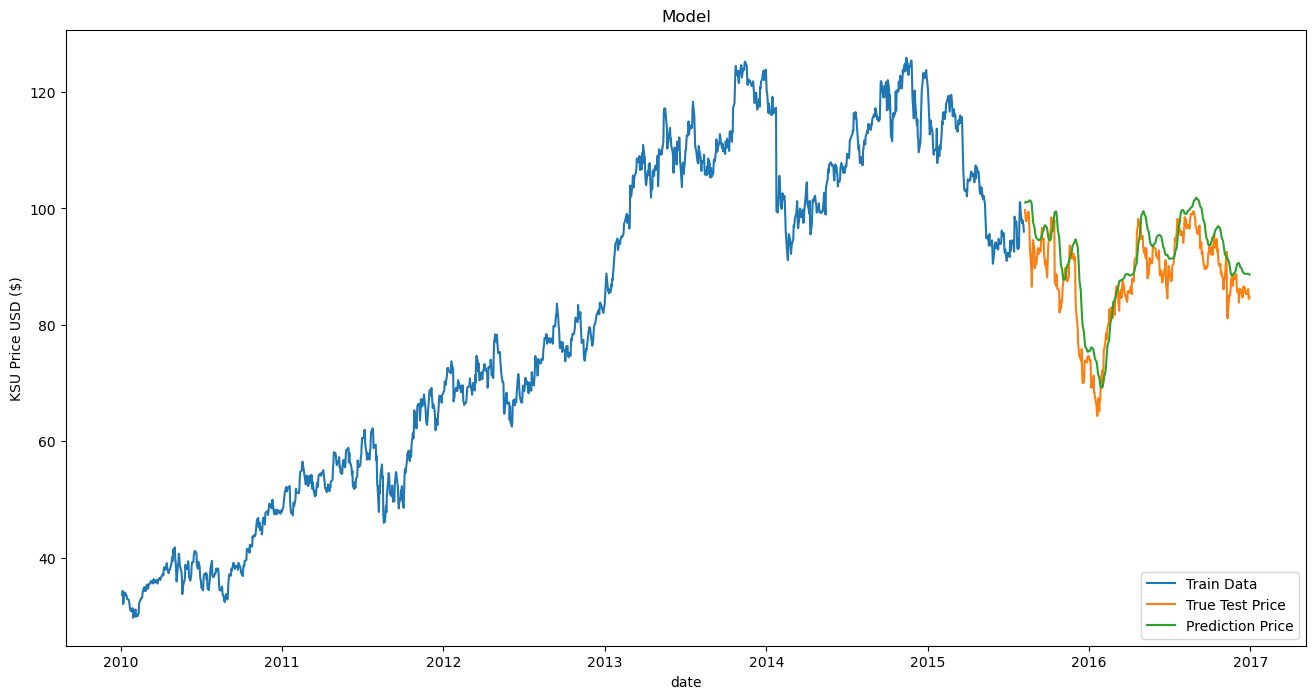

Stop


In [54]:
#Visualization of LSTM model
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('date')
plt.ylabel('KSU Price USD ($)')
plt.plot(stock_data[:train_size]['close'], label='Train Data')
plt.plot(stock_data[train_size:].index, stock_data[train_size:]['close'], label='True Test Price')
plt.plot(stock_data[train_size:].index, predictions, label='Prediction Price')
plt.legend(loc='lower right')
plt.show()

print('Stop')

Epoch 1/30
43/43 [==============================] - 1s 30ms/step - loss: 0.0022
Epoch 2/30
43/43 [==============================] - 1s 30ms/step - loss: 0.0020
Epoch 3/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0019
Epoch 4/30
43/43 [==============================] - 1s 30ms/step - loss: 0.0020
Epoch 5/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0019
Epoch 6/30
43/43 [==============================] - 1s 30ms/step - loss: 0.0019
Epoch 7/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0019
Epoch 8/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0019
Epoch 9/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0019
Epoch 10/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0020
Epoch 11/30
43/43 [==============================] - 1s 30ms/step - loss: 0.0018
Epoch 12/30
43/43 [==============================] - 1s 29ms/step - loss: 0.0017
Epoch 13/30
43/43 [==================

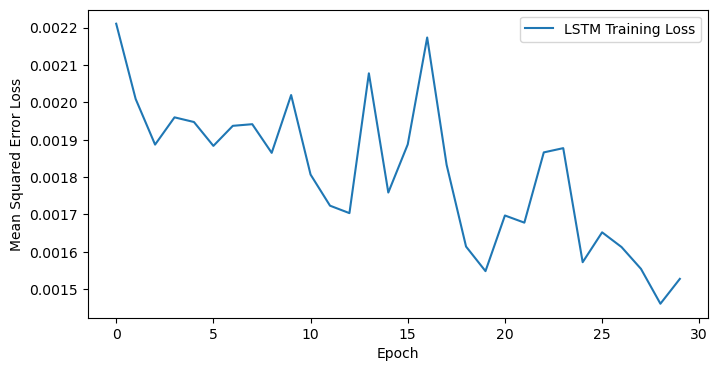

In [59]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

#Training Loss Curves
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

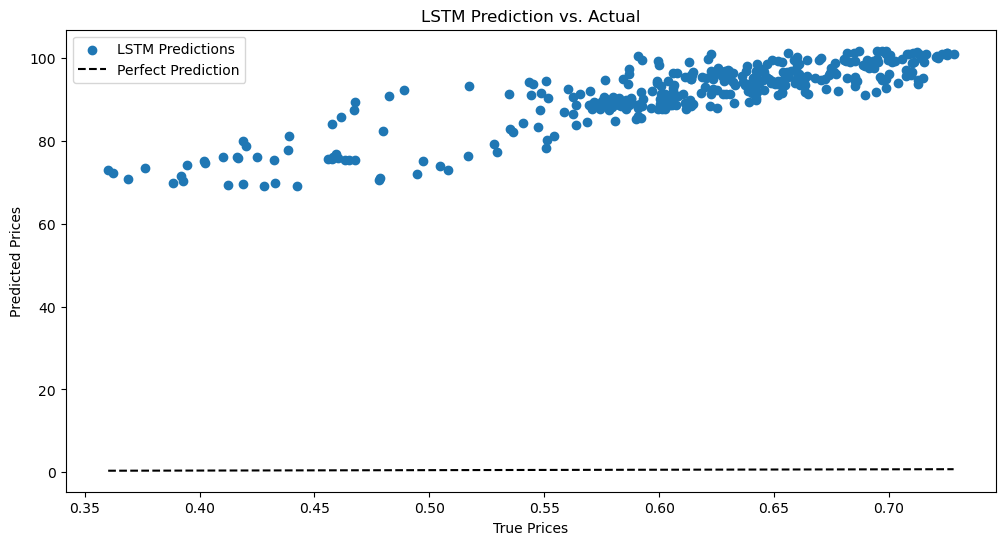

In [56]:
#Prediction vs. Actual Scatter Plots
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, label='LSTM Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label='Perfect Prediction')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('LSTM Prediction vs. Actual')
plt.legend()
plt.show()

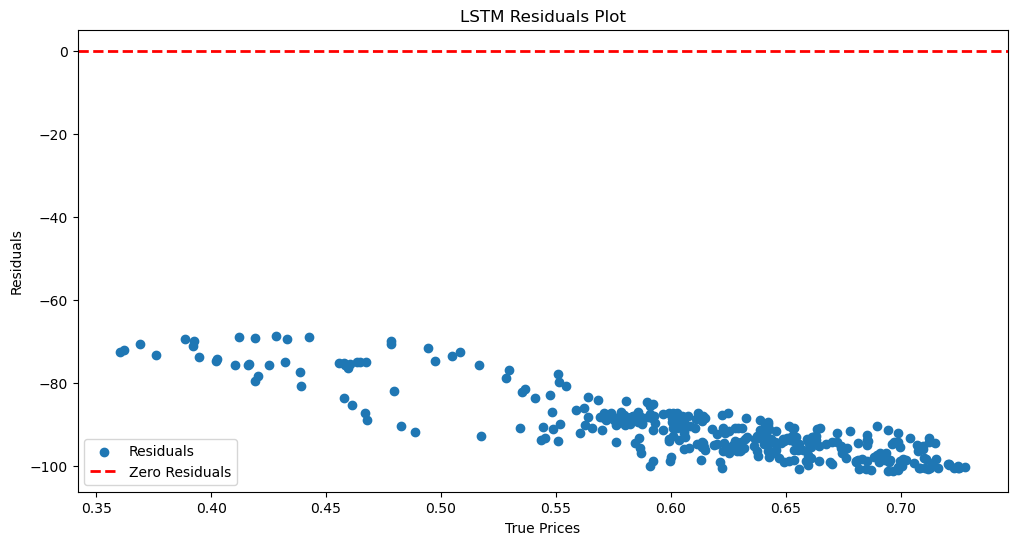

In [57]:
#Residual Plots
residuals = y_test - predictions.flatten()
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('True Prices')
plt.ylabel('Residuals')
plt.title('LSTM Residuals Plot')
plt.legend()
plt.show()

In [60]:
#Bidirectional LSTM model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

# Load and preprocess the dataset
df = pd.read_csv("/Users/swathy/Downloads/prices-split-adjusted.csv")
ksu_rows = df[df['symbol'] == 'KSU']
stock_data = ksu_rows[['date', 'close']].copy()
stock_data['date'] = pd.to_datetime(stock_data['date'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['close'].values.reshape(-1, 1))

# Choose the number of past days to use for the prediction
look_back = 60

# Split the data into train (80%) and test (20%) datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - look_back:]

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the Bidirectional LSTM Model
model_bidirectional = Sequential()
model_bidirectional.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model_bidirectional.add(Dropout(0.2))
model_bidirectional.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model_bidirectional.add(Dropout(0.2))
model_bidirectional.add(Bidirectional(LSTM(units=50)))
model_bidirectional.add(Dropout(0.2))
model_bidirectional.add(Dense(units=1))
model_bidirectional.compile(optimizer='adam', loss='mean_squared_error')

# Train the Bidirectional LSTM Model
model_bidirectional.fit(X_train, y_train, epochs=30, batch_size=32)

# Predictions for both models
predictions_lstm = scaler.inverse_transform(model.predict(X_test))
predictions_bidirectional = scaler.inverse_transform(model_bidirectional.predict(X_test))

# Evaluate and compare models
rmse_lstm = np.sqrt(np.mean((predictions_lstm - scaler.inverse_transform(y_test.reshape(-1, 1))) ** 2))
rmse_bidirectional = np.sqrt(np.mean((predictions_bidirectional - scaler.inverse_transform(y_test.reshape(-1, 1))) ** 2))
print(f'Bidirectional LSTM RMSE: {rmse_bidirectional}')





Epoch 1/30
43/43 [==============================] - 5s 35ms/step - loss: 0.0270
Epoch 2/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0051
Epoch 3/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0037
Epoch 4/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0035
Epoch 5/30
43/43 [==============================] - 2s 37ms/step - loss: 0.0037
Epoch 6/30
43/43 [==============================] - 2s 37ms/step - loss: 0.0034
Epoch 7/30
43/43 [==============================] - 2s 37ms/step - loss: 0.0032
Epoch 8/30
43/43 [==============================] - 2s 38ms/step - loss: 0.0029
Epoch 9/30
43/43 [==============================] - 2s 38ms/step - loss: 0.0034
Epoch 10/30
43/43 [==============================] - 2s 38ms/step - loss: 0.0033
Epoch 11/30
43/43 [==============================] - 2s 39ms/step - loss: 0.0023
Epoch 12/30
43/43 [==============================] - 2s 37ms/step - loss: 0.0024
Epoch 13/30
43/43 [==================

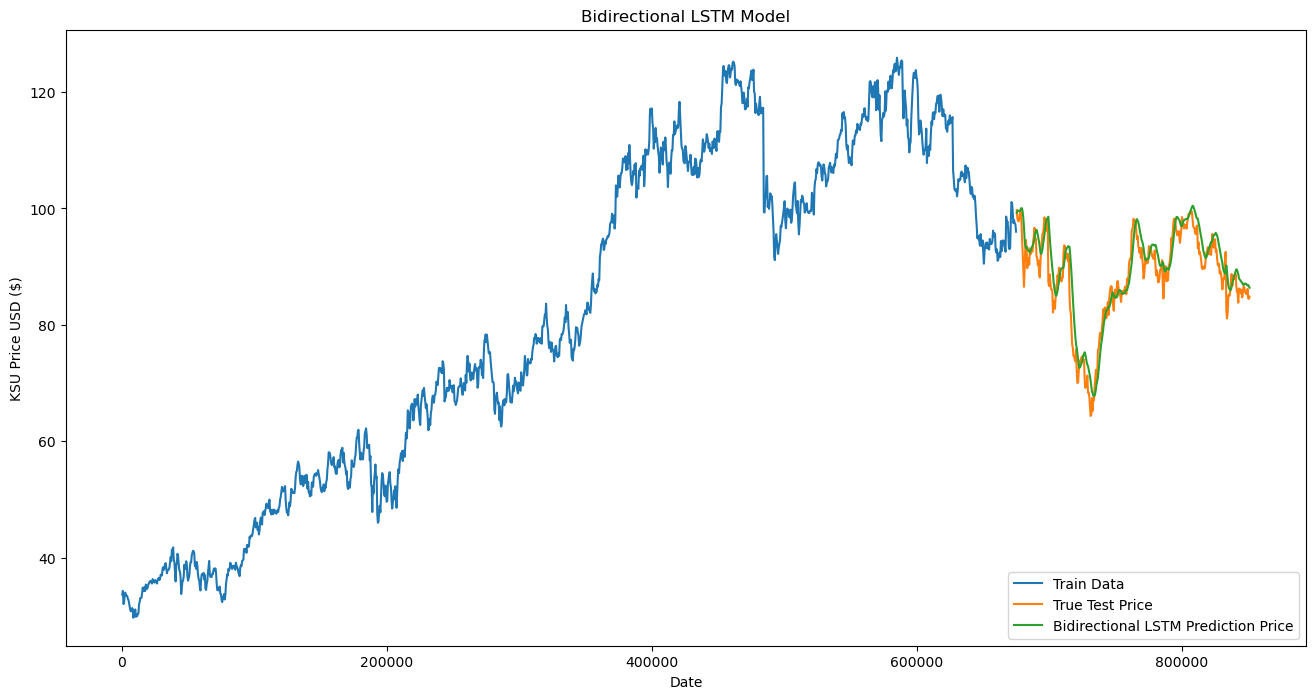

In [61]:
# Visualization for Bidirectional LSTM Model
plt.figure(figsize=(16, 8))
plt.title('Bidirectional LSTM Model')
plt.xlabel('Date')
plt.ylabel('KSU Price USD ($)')
plt.plot(stock_data[:train_size]['close'], label='Train Data')
plt.plot(stock_data[train_size:].index, stock_data[train_size:]['close'], label='True Test Price')
plt.plot(stock_data[train_size:].index, predictions_bidirectional, label='Bidirectional LSTM Prediction Price')
plt.legend(loc='lower right')
plt.show()


Epoch 1/30
43/43 [==============================] - 5s 35ms/step - loss: 0.0017
Epoch 2/30
43/43 [==============================] - 1s 34ms/step - loss: 0.0016
Epoch 3/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0014
Epoch 4/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0015
Epoch 5/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0016
Epoch 6/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0013
Epoch 7/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0013
Epoch 8/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0015
Epoch 9/30
43/43 [==============================] - 2s 37ms/step - loss: 0.0015
Epoch 10/30
43/43 [==============================] - 2s 36ms/step - loss: 0.0014
Epoch 11/30
43/43 [==============================] - 2s 38ms/step - loss: 0.0014
Epoch 12/30
43/43 [==============================] - 2s 41ms/step - loss: 0.0015
Epoch 13/30
43/43 [==================

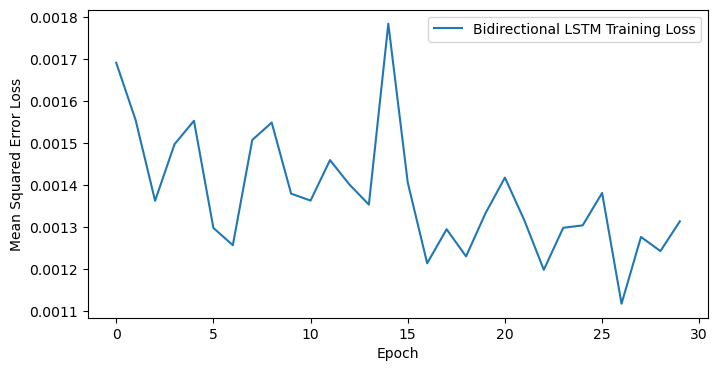

In [63]:
from tensorflow.keras.callbacks import History

history_bidirectional = History()
model_bidirectional.compile(optimizer='adam', loss='mean_squared_error')
model_bidirectional.fit(X_train, y_train, epochs=30, batch_size=32, callbacks=[history_bidirectional])

#Training Loss Curves for Bidirectional LSTM
plt.figure(figsize=(8, 4))
plt.plot(history_bidirectional.history['loss'], label='Bidirectional LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

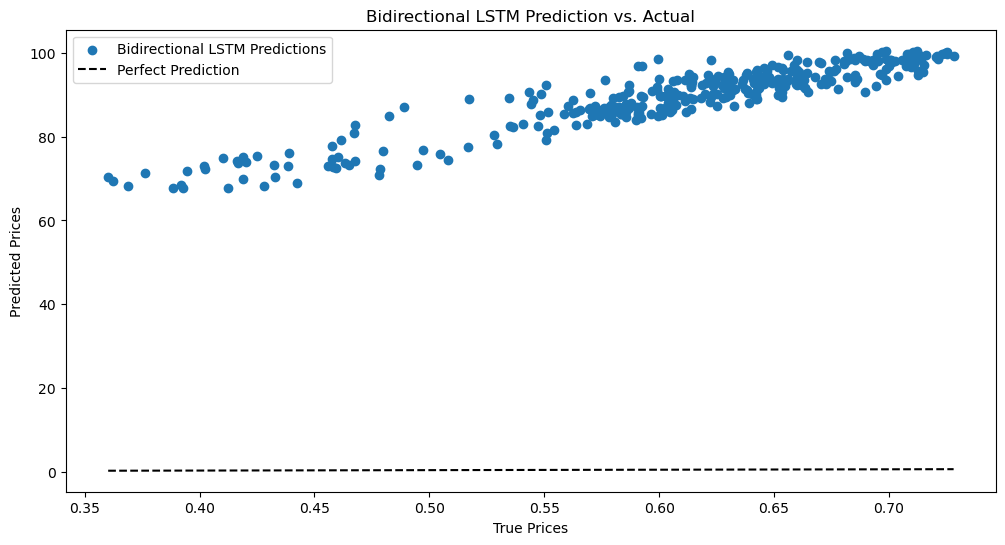

In [64]:
#Prediction vs. Actual Scatter Plots
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions_bidirectional, label='Bidirectional LSTM Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label='Perfect Prediction')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Bidirectional LSTM Prediction vs. Actual')
plt.legend()
plt.show()

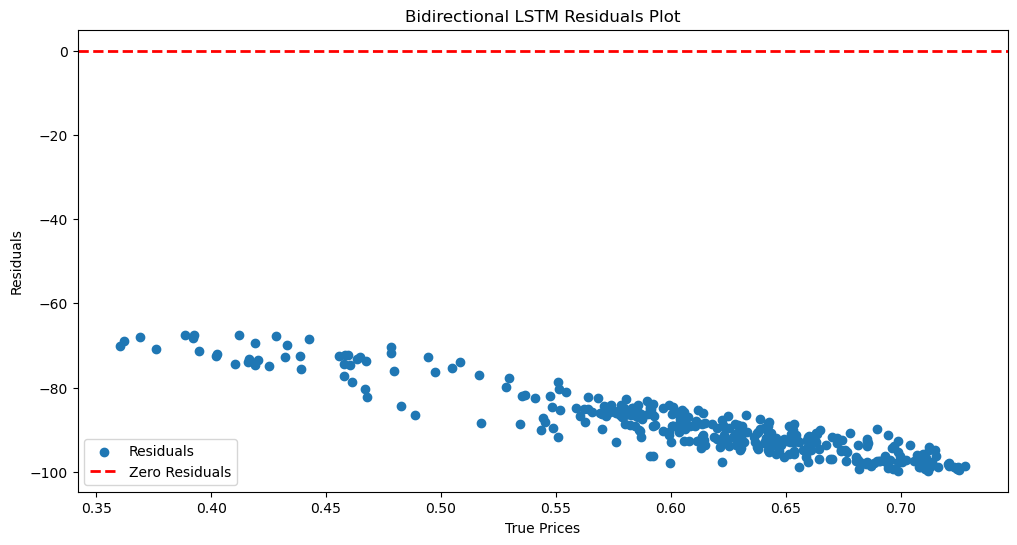

In [65]:
#Residual Plots
residuals_bidirectional = y_test - predictions_bidirectional.flatten()
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals_bidirectional, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('True Prices')
plt.ylabel('Residuals')
plt.title('Bidirectional LSTM Residuals Plot')
plt.legend()
plt.show()

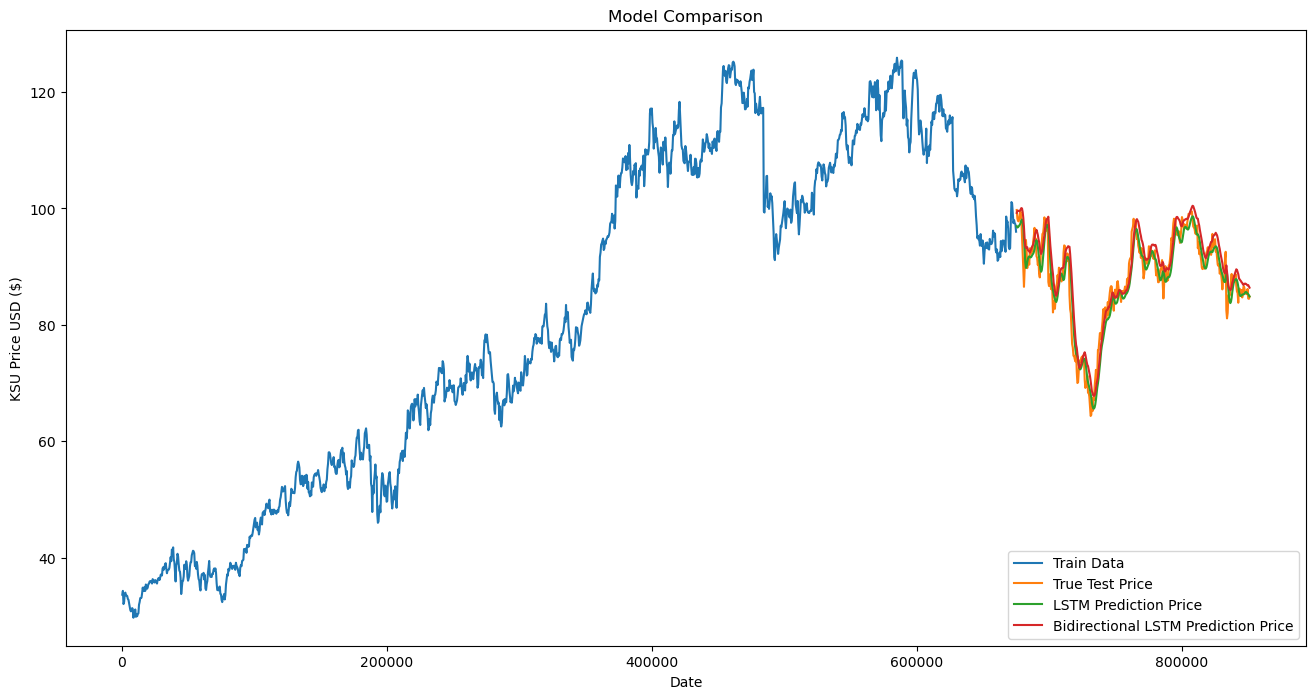

In [66]:
#Visualize results for both models
plt.figure(figsize=(16, 8))
plt.title('Model Comparison')
plt.xlabel('Date')
plt.ylabel('KSU Price USD ($)')
plt.plot(stock_data[:train_size]['close'], label='Train Data')
plt.plot(stock_data[train_size:].index, stock_data[train_size:]['close'], label='True Test Price')
plt.plot(stock_data[train_size:].index, predictions_lstm, label='LSTM Prediction Price')
plt.plot(stock_data[train_size:].index, predictions_bidirectional, label='Bidirectional LSTM Prediction Price')
plt.legend(loc='lower right')
plt.show()